#### AirBnB DataSet

#### Business Understanding 

Having read about AirBnB on the internet, I will try to answer three questions:

* What areas have the highest priced AirBnB homes? 
  
* What do the different types of properties earn on Average ?How do prices differ between between Seattle and Boston?

* What are factors that mostly affect AirbnB prices?

 
 


### Data Set Investigation - 

#### Data Understanding:  This initial investigation of the data will involve data famailiarisatin and enable me to identify any data quality issues.

In [1]:

import numpy as np
import os
import gmaps
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
#surveys_copy= surveys_df.copy()

In [2]:
## Reading in the listings for seattle

df_s_listings = pd.read_csv('s_listings.csv')
df_s_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
## Reading in the listings for Boston

df_b_listings = pd.read_csv('b_listings.csv')
df_b_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
df_s_listings.shape

(3818, 92)

In [5]:
df_b_listings.shape

(3585, 95)

In [6]:
df_s_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [7]:
## Have a look at the Column names and investigate the columns
col_names = list(df_s_listings)


In [8]:
## Which columns have no missing values Boston

complete_col_b = df_b_listings.columns[~df_b_listings.isnull().any()].tolist()

In [9]:
## Which columns have no missing values - Seattle

complete_col_s = df_s_listings.columns[~df_s_listings.isnull().any()].tolist()

In [10]:
## Which columns have missing values
miss_col_s = df_s_listings.columns[df_s_listings.isnull().any()].tolist()

In [11]:
## Which columns have all missing values
all_miss_col_s = df_s_listings.columns[df_s_listings.isnull().all()].tolist()

In [12]:
## Which columns have all missing values
all_missing_col_s = df_b_listings.columns[df_b_listings.isnull().all()].tolist()

In [13]:
## Check the count of missing values in each column
count_missing_s = df_s_listings.isnull().sum().sort_values(ascending=False)

In [14]:
## Check the count of missing values in each column
count_missing_b = df_b_listings.isnull().sum().sort_values(ascending=False)

### Question 1 - What areas have the highest priced AirBnB homes?

I looked at the price columns but I can't compare the prices directly because of the different number of bedrooms or people that the listings can accomodate. To get the prices on some comparable sacle, I will compare the prices per room.

#### Data Preparation  steps

This will involve data selection and data cleansing.

In [15]:


##  Get a Property subset to get hightest earning locations

prop_rates = df_s_listings[['id','street','property_type','price','bedrooms','accommodates','neighbourhood','city','zipcode', 'latitude',
 'longitude']]

In [16]:
prop_rates.head()

,id,street,property_type,price,bedrooms,accommodates,neighbourhood,city,zipcode,latitude,longitude
0,241032,"Gilman Dr W, Seattle, WA 98119, United States",Apartment,$85.00,1.0,4,Queen Anne,Seattle,98119,47.636289,-122.371025
1,953595,"7th Avenue West, Seattle, WA 98119, United States",Apartment,$150.00,1.0,4,Queen Anne,Seattle,98119,47.639123,-122.365666
2,3308979,"West Lee Street, Seattle, WA 98119, United States",House,$975.00,5.0,11,Queen Anne,Seattle,98119,47.629724,-122.369483
3,7421966,"8th Avenue West, Seattle, WA 98119, United States",Apartment,$100.00,0.0,3,Queen Anne,Seattle,98119,47.638473,-122.369279
4,278830,"14th Ave W, Seattle, WA 98119, United States",House,$450.00,3.0,6,Queen Anne,Seattle,98119,47.632918,-122.372471


In [17]:
## Look at the datatypes of the property subsets

prop_rates.select_dtypes(include=['object', 'category']).head()

,street,property_type,price,neighbourhood,city,zipcode
0,"Gilman Dr W, Seattle, WA 98119, United States",Apartment,$85.00,Queen Anne,Seattle,98119
1,"7th Avenue West, Seattle, WA 98119, United States",Apartment,$150.00,Queen Anne,Seattle,98119
2,"West Lee Street, Seattle, WA 98119, United States",House,$975.00,Queen Anne,Seattle,98119
3,"8th Avenue West, Seattle, WA 98119, United States",Apartment,$100.00,Queen Anne,Seattle,98119
4,"14th Ave W, Seattle, WA 98119, United States",House,$450.00,Queen Anne,Seattle,98119


In [18]:
## Clean up the price column - removing the dollar sign  and change to float

prop_rates.price = prop_rates.price.str.replace('$','')
prop_rates.price = prop_rates.price.str.replace(',','')
prop_rates.price = prop_rates.price.astype(float)
prop_rates.head()

,id,street,property_type,price,bedrooms,accommodates,neighbourhood,city,zipcode,latitude,longitude
0,241032,"Gilman Dr W, Seattle, WA 98119, United States",Apartment,85.0,1.0,4,Queen Anne,Seattle,98119,47.636289,-122.371025
1,953595,"7th Avenue West, Seattle, WA 98119, United States",Apartment,150.0,1.0,4,Queen Anne,Seattle,98119,47.639123,-122.365666
2,3308979,"West Lee Street, Seattle, WA 98119, United States",House,975.0,5.0,11,Queen Anne,Seattle,98119,47.629724,-122.369483
3,7421966,"8th Avenue West, Seattle, WA 98119, United States",Apartment,100.0,0.0,3,Queen Anne,Seattle,98119,47.638473,-122.369279
4,278830,"14th Ave W, Seattle, WA 98119, United States",House,450.0,3.0,6,Queen Anne,Seattle,98119,47.632918,-122.372471


#### You can tell by looking at the first two rows that although the first row has highest price is 1000.00,it actually has 2 bedrooms, and  the second listing for an almost similar price  has only one bedroom. So I would compare the prices per bedrooms and see what the looks like. Additionally, I'll use the accommodates column to get a price per person as i believe this will be  a good indicator of levelled price. 

In [19]:

prop_rates.sort_values(by=['price','bedrooms'], ascending=False).head()



,id,street,property_type,price,bedrooms,accommodates,neighbourhood,city,zipcode,latitude,longitude
3122,4825073,"16th Avenue Northeast, Seattle, WA 98115, Unit...",House,1000.0,2.0,4,Ravenna,Seattle,98115,47.683364,-122.311467
1208,3345341,"8th Avenue, Seattle, WA 98101, United States",Apartment,999.0,1.0,4,Belltown,Seattle,98101,47.615379,-122.335259
2,3308979,"West Lee Street, Seattle, WA 98119, United States",House,975.0,5.0,11,Queen Anne,Seattle,98119,47.629724,-122.369483
3443,2720963,"25th Avenue West, Seattle, WA 98199, United St...",House,950.0,3.0,6,Magnolia,Seattle,98199,47.641620,-122.389725
1279,4464824,"2nd Avenue, Seattle, WA 98121, United States",Apartment,899.0,3.0,10,Belltown,Seattle,98121,47.615165,-122.346572


Having looked at the prices above, I can't just sort to get the highest prices because some properties have more rooms and this is usally reflected in the price.  I can going to get a price per room and use that to get the most expensive AirBnB properties.



In [20]:
## To avoid division errors, I will check if there are any properties with 0 or Nan values for the number of bedrooms.
## I'll remove these 378
zero_beds = sum(prop_rates['bedrooms'] == 0)
missing_beds = sum(prop_rates['bedrooms'].isnull())

total = zero_beds + missing_beds
total               

378

In [21]:
## Drop any rows with missing values  and 0 bedrooms to avoid Inf or Nan values.
prop_rates = prop_rates.dropna(subset=['bedrooms'])  
clean_prop = prop_rates[(prop_rates['bedrooms'] != 0)]

In [22]:
clean_prop['price_per_room'] = clean_prop['price']/clean_prop['bedrooms']
clean_prop['price_per_person'] = clean_prop['price']/clean_prop['accommodates']
clean_prop.head()

,id,street,property_type,price,bedrooms,accommodates,neighbourhood,city,zipcode,latitude,longitude,price_per_room,price_per_person
0,241032,"Gilman Dr W, Seattle, WA 98119, United States",Apartment,85.0,1.0,4,Queen Anne,Seattle,98119,47.636289,-122.371025,85.0,21.250000
1,953595,"7th Avenue West, Seattle, WA 98119, United States",Apartment,150.0,1.0,4,Queen Anne,Seattle,98119,47.639123,-122.365666,150.0,37.500000
2,3308979,"West Lee Street, Seattle, WA 98119, United States",House,975.0,5.0,11,Queen Anne,Seattle,98119,47.629724,-122.369483,195.0,88.636364
4,278830,"14th Ave W, Seattle, WA 98119, United States",House,450.0,3.0,6,Queen Anne,Seattle,98119,47.632918,-122.372471,150.0,75.000000
5,5956968,"West Comstock Street, Seattle, WA 98119, Unite...",House,120.0,1.0,2,Queen Anne,Seattle,98119,47.630525,-122.366174,120.0,60.000000


In [23]:
## Looking at price per rooms
clean_prop.sort_values(by=['price_per_room','bedrooms','price'], ascending=False).head()

,id,street,property_type,price,bedrooms,accommodates,neighbourhood,city,zipcode,latitude,longitude,price_per_room,price_per_person
1208,3345341,"8th Avenue, Seattle, WA 98101, United States",Apartment,999.0,1.0,4,Belltown,Seattle,98101,47.615379,-122.335259,999.0,249.75
3436,3413183,"20th Avenue West, Seattle, WA 98199, United St...",Apartment,550.0,1.0,2,Magnolia,Seattle,98199,47.648067,-122.382861,550.0,275.00
3122,4825073,"16th Avenue Northeast, Seattle, WA 98115, Unit...",House,1000.0,2.0,4,Ravenna,Seattle,98115,47.683364,-122.311467,500.0,250.00
1760,9174507,"Southwest Hanford Street, Seattle, WA 98116, U...",House,399.0,1.0,2,Alki,Seattle,98116,47.574940,-122.404551,399.0,199.50
1498,7350870,"1st Avenue, Seattle, WA 98101, United States",Apartment,365.0,1.0,4,Central Business District,Seattle,98101,47.606624,-122.337337,365.0,91.25


In [24]:
## Looking at price per person

clean_prop.sort_values(by=['price_per_person','accommodates','price'], ascending=False).head()

,id,street,property_type,price,bedrooms,accommodates,neighbourhood,city,zipcode,latitude,longitude,price_per_room,price_per_person
3436,3413183,"20th Avenue West, Seattle, WA 98199, United St...",Apartment,550.0,1.0,2,Magnolia,Seattle,98199,47.648067,-122.382861,550.0,275.00
3122,4825073,"16th Avenue Northeast, Seattle, WA 98115, Unit...",House,1000.0,2.0,4,Ravenna,Seattle,98115,47.683364,-122.311467,500.0,250.00
1603,9781881,"8th Avenue, Seattle, WA 98104, United States",Condominium,250.0,1.0,1,First Hill,Seattle,98104,47.609567,-122.327712,250.0,250.00
1208,3345341,"8th Avenue, Seattle, WA 98101, United States",Apartment,999.0,1.0,4,Belltown,Seattle,98101,47.615379,-122.335259,999.0,249.75
1760,9174507,"Southwest Hanford Street, Seattle, WA 98116, U...",House,399.0,1.0,2,Alki,Seattle,98116,47.574940,-122.404551,399.0,199.50


#### Data Modelling steps 

This involves performing aggregrations on the data and displaying the data.



#### To get the prices for the highest location, I'm going to use Zipcode as the grouping factor; looking to find the average prices per zipcode.

In [25]:
## Group by Zip code - price per room
prices_zip_r = clean_prop[['zipcode', 'price_per_room']]
avg_prices_r = prices_zip_r.groupby(['zipcode']).mean().sort_values(by=['price_per_room'],ascending=False)#
avg_prices_r.head(6)

,price_per_room
zipcode,
98134,152.000000
98101,136.602713
98121,125.713647
98104,124.740741
98109,116.070479
98119,105.156168


In [26]:
## Group by Zip code - price per person
prices_zip_p = clean_prop[['zipcode', 'price_per_person']]
avg_prices_p = prices_zip_p.groupby(['zipcode']).mean().sort_values(by=['price_per_person'],ascending=False)#
avg_prices_p.head(6)

,price_per_person
zipcode,
98104,51.582922
98109,50.349810
98112,47.819927
98119,47.144617
98101,47.023117
98134,46.137500


##### Looking at the the two averages, the 5 out of the top 6 are the same for price per person and price per bedrooms  

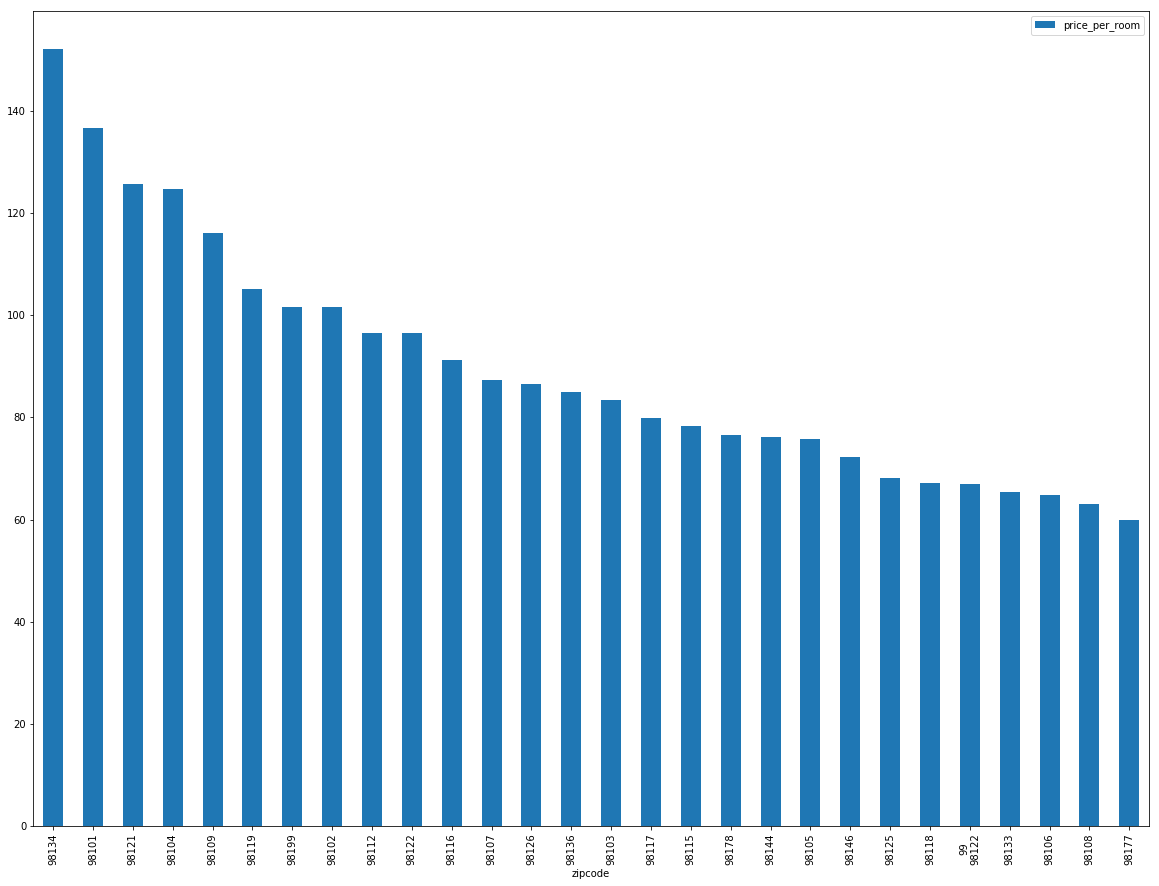

In [27]:
avg_prices_r.plot(kind='bar', width=0.5, zorder=1,figsize=(20,15))

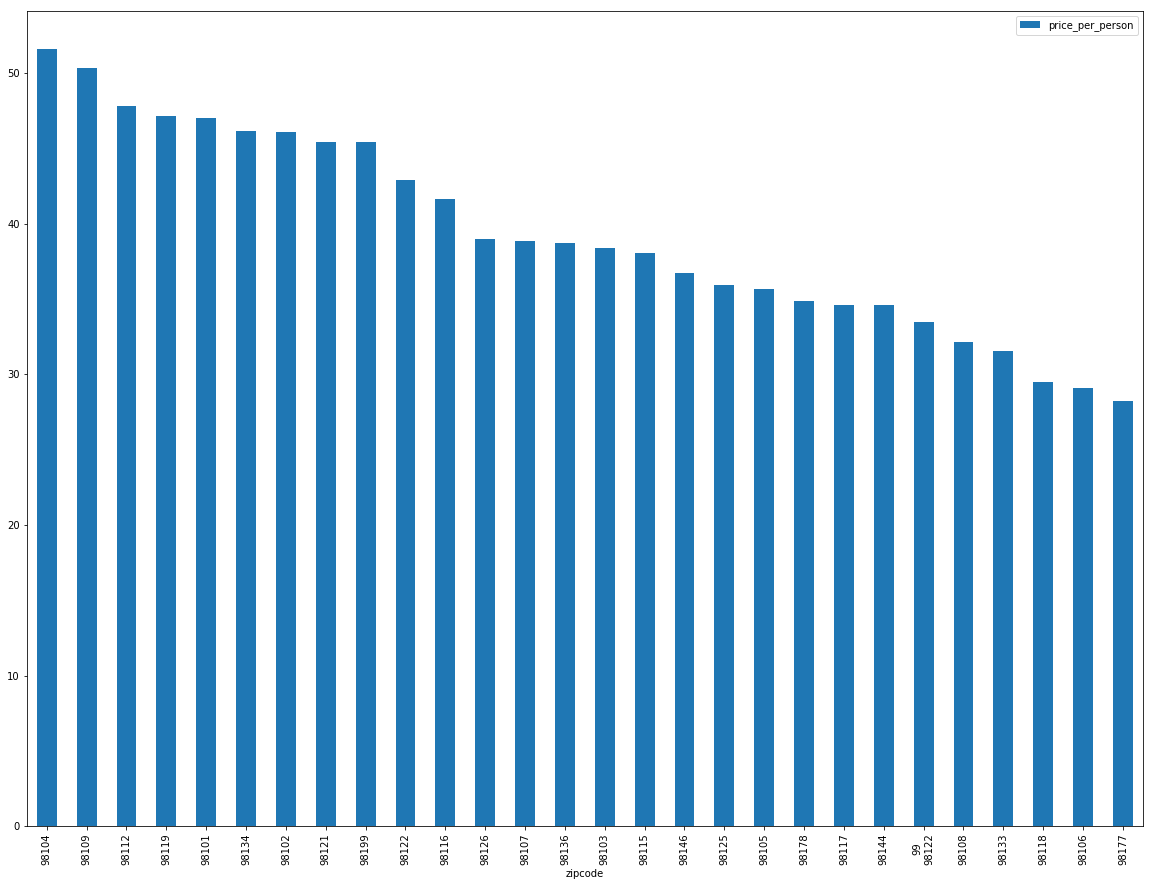

In [28]:
avg_prices_p.plot(kind='bar', width=0.5, zorder=1,figsize=(20,15))

Looking at this chart, you can see that the post code 98134 has the highest average past, Note however, the averages may vary and be skewed depending on the number of apartments in this zipcode.

In [29]:
## Getting the lisitings with the  in highest price for the price per person  - put the street on a map
best_priced_location = clean_prop[(clean_prop.zipcode == '98104') | (clean_prop.zipcode == '98109')].sort_values(by=['zipcode','price_per_room'],ascending=False)


In [30]:
## Getting the lisitings with the  in highest price for the price per person  - put the street on a map
best_priced_location = clean_prop[(clean_prop.zipcode == '98104')].sort_values(by=['zipcode','price_per_person'],ascending=False)



In [31]:
best_priced_location.head()

,id,street,property_type,price,bedrooms,accommodates,neighbourhood,city,zipcode,latitude,longitude,price_per_room,price_per_person
1603,9781881,"8th Avenue, Seattle, WA 98104, United States",Condominium,250.0,1.0,1,First Hill,Seattle,98104,47.609567,-122.327712,250.0,250.0
1688,8446689,"Prudential, 114 Alaskan Way South, Seattle, WA...",Apartment,249.0,1.0,2,Pioneer Square,Seattle,98104,47.600688,-122.334694,249.0,124.5
1708,4574039,"Alaskan Way S, Seattle, WA 98104, United States",Loft,300.0,1.0,3,NaN,Seattle,98104,47.598942,-122.336936,300.0,100.0
1690,6662639,"1st Avenue South, Seattle, WA 98104, United St...",Apartment,175.0,1.0,2,Pioneer Square,Seattle,98104,47.600895,-122.335590,175.0,87.5
1701,3497530,"Western Avenue, Seattle, WA 98104, United States",Apartment,350.0,1.0,4,Central Business District,Seattle,98104,47.602794,-122.335644,350.0,87.5


#### Display and Evaluate the results

In [32]:
seattle_coordinates = (47.608013, -122.335167)
fig = gmaps.figure(center=seattle_coordinates, zoom_level=12)
markers = gmaps.marker_layer(best_priced_location[['latitude', 'longitude']])
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

It appears that the most expensive AirBnB's are closer to the sea front and water front park which has a lot of attractions. The promiximity to these attractions may be one of the reasons this location has the highest average price.

## Question 2 Compare rates between seattle and boston



##### Data prepration steps

This will involve data selection and data cleansing.

In [33]:
## Function to get price per person and price for rooms and thier averages group by 
def clean_props(df):
    """
    
    A function to get the price per person and price per room and the average prices. 
    
    The function will perform the following:
    
    -- select a subset of columns  needed
    -- clean up the price column
    -- remove any 0 values to avoid division errors
    -- get the price per room and price per person using the price, bedrooms ,accomodates and property type features
    
    parameters:
    
    arg1(dataframe): This function take the listings dataframe
    
    Returns:
        
    (dataframes) avg_prices_prop_p, avg_prices_prop_r: The average prices per room and per person
    group by property type.
    
    
    """
    ## Select the columns needed
    prop_rates = df[['id','street','property_type','price','bedrooms','accommodates','neighbourhood','city','zipcode', 'latitude','longitude']]
    
    ##  clean the price column
    prop_rates.price = prop_rates.price.str.replace('$','')
    prop_rates.price = prop_rates.price.str.replace(',','')
    prop_rates.price = prop_rates.price.astype(float)
    
    ## remove 0 bedrooms to avoid division errors
    
    prop_rates = prop_rates.dropna(subset=['bedrooms'])  
    clean_prop = prop_rates[(prop_rates['bedrooms'] != 0)]
    
    ## Get the price per room and price per person
    
    clean_prop['price_per_room'] = clean_prop['price']/clean_prop['bedrooms']
    clean_prop['price_per_person'] = clean_prop['price']/clean_prop['accommodates']
    
    ## Get the average price per room per zip code
    
    prices_zip = clean_prop[['zipcode', 'price_per_room']]
    avg_prices_zip = prices_zip.groupby(['zipcode']).mean().sort_values(by=['price_per_room'],ascending=False)
    
    ## Get the average price per person per property type
    
    prices_prop_p = clean_prop[['property_type', 'price_per_person']]
    avg_prices_prop_p = prices_prop_p.groupby(['property_type']).mean().sort_values(by=['price_per_person'],ascending=False)
    
    prices_prop_r = clean_prop[['property_type', 'price_per_room']]
    avg_prices_prop_r = prices_prop_r.groupby(['property_type']).mean().sort_values(by=['price_per_room'],ascending=False)
    
    return avg_prices_prop_p,avg_prices_prop_r

In [34]:
## Get the average prices for Seattle and Boston for both people and rooms.

b_avg_prices_prop_p,b_avg_prices_prop_r = clean_props(df_b_listings)
s_avg_prices_prop_p,s_avg_prices_prop_r = clean_props(df_s_listings)

In [35]:
b_avg_prices_prop_p

,price_per_person
property_type,
Other,132.338235
Guesthouse,72.250000
Loft,69.029018
Condominium,65.594919
Bed & Breakfast,65.579268
Apartment,64.572292
Townhouse,62.387143
Villa,55.291667
Boat,53.851190


In [36]:
s_avg_prices_prop_r.head()

,price_per_room
property_type,
Boat,137.489583
Loft,126.481481
Condominium,118.277778
Bed & Breakfast,112.054054
Apartment,106.174142


#### Data Modelling steps 

This involves performing aggregrations on the data and displaying the data.

In [37]:
## The plan is to join the two datasets together, so start by resetting the indexes
s_avg_prices_prop_p = s_avg_prices_prop_p.reset_index()
b_avg_prices_prop_p = b_avg_prices_prop_p.reset_index()
s_avg_prices_prop_r = s_avg_prices_prop_r.reset_index()
b_avg_prices_prop_r = b_avg_prices_prop_r.reset_index()

In [38]:
## Add the city feature so we can differentiate between the two datasets once we join them togther.
s_avg_prices_prop_p['city'] = 'Seattle'
b_avg_prices_prop_p['city'] = 'Boston'
s_avg_prices_prop_r['city'] = 'Seattle'
b_avg_prices_prop_r['city'] = 'Boston'

In [39]:
s_avg_prices_prop_p.head()

,property_type,price_per_person,city
0,Boat,84.682292,Seattle
1,Bed & Breakfast,56.828829,Seattle
2,Loft,52.580864,Seattle
3,Condominium,48.645977,Seattle
4,Chalet,47.875000,Seattle


In [40]:
b_avg_prices_prop_r.head()

,property_type,price_per_room,city
0,Other,229.941176,Boston
1,Villa,189.500000,Boston
2,Boat,160.416667,Boston
3,Loft,146.473958,Boston
4,Guesthouse,144.500000,Boston


In [41]:
## Join the two dataframes together.
prop_price_pp = b_avg_prices_prop_p.append(s_avg_prices_prop_p)
prop_price_pr = b_avg_prices_prop_r.append(s_avg_prices_prop_r)

In [42]:
## Sort the joined dataframes
prop_price_pp_sort = prop_price_pp.sort_values(by=['price_per_person'],ascending=False)
prop_price_pr_sort = prop_price_pr.sort_values(by=['price_per_room'],ascending=False)

#### Display and Evaluate the results

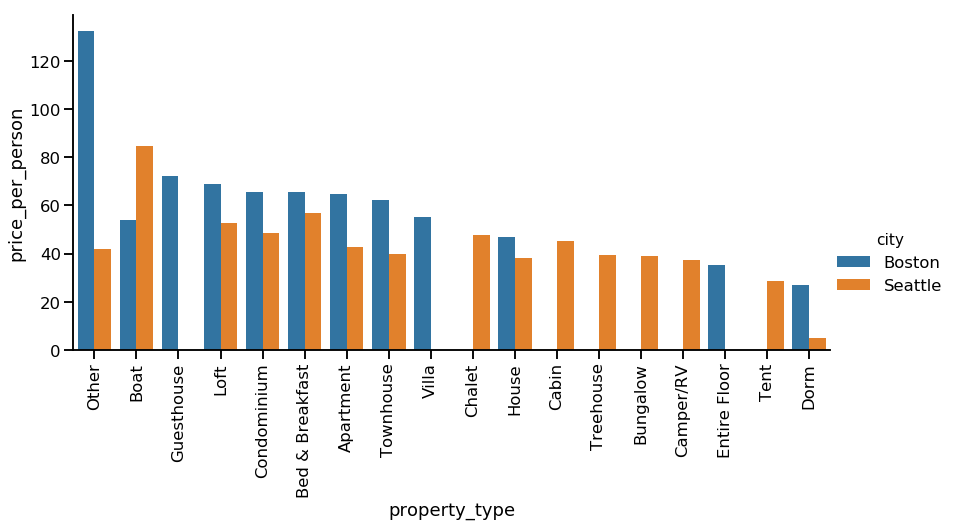

In [43]:
sns.set_context("talk")
grid = sns.catplot(x="property_type", y="price_per_person", hue="city", kind="bar", height=6, aspect=2, data=prop_price_pp_sort) 
grid.set_xticklabels(rotation=90)
plt.show()

### On average the rates per person is more in Boston than Seattke except for when renting a Boat; when seattle is more expensive. 

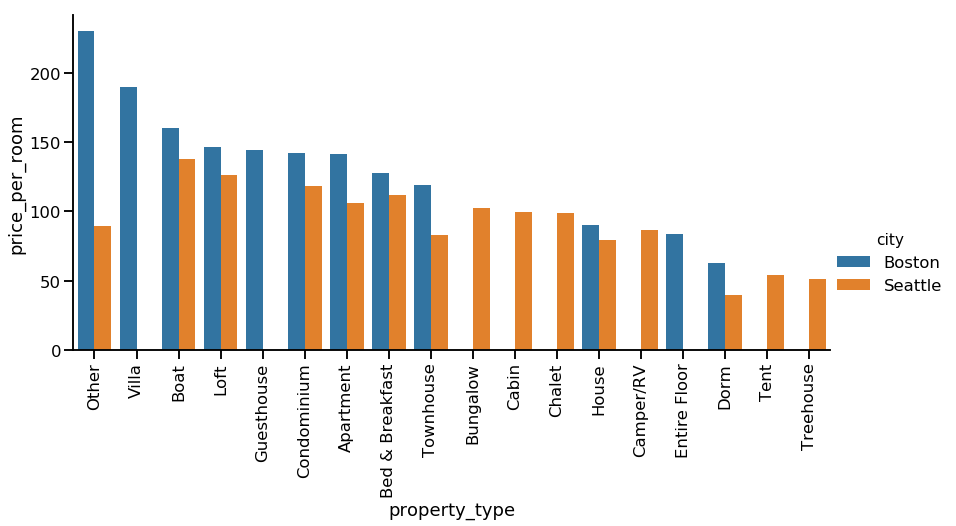

In [44]:
sns.set_context("talk")
grid = sns.catplot(x="property_type", y="price_per_room", hue="city", kind="bar", height=6, aspect=2, data=prop_price_pr_sort) 
grid.set_xticklabels(rotation=90)
plt.show()



Both graphs show that on average rates per person and per room is more in Boston than Seattle.  There are some property types that exist in once city but not the other. For example, Bungalows, Cabins or Chalets, tents or Treehouses only exist in Seattle while you have Villas and Guesthouses in Boston. However, for all other property types except for the boat in price_per_person, Boston is generally more expensive that Seattle.Seattle's georgraphy with acccess to rain forests, mountains and water explains the diverse types of property in the city.

#### Question 3 - What are the factors that affect AirBnB prices

#### Data Preparation  steps

In [45]:
### Start by having a look at the different data types for each feature.

list_str =[]
list_numeric =[]
list_str = df_s_listings.select_dtypes(['object']).columns
list_numeric = df_s_listings.select_dtypes(['number']).columns

In [46]:
print (len(list_str))
print (len(list_numeric))

62
30


In [47]:
## Quick look at String type features
list_str

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

In [48]:
## Quick look at Numeric type features
list_numeric

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [49]:
### first let's make a copy of the dataaset for the Machinle Learning process

df_s_listings_ML = df_s_listings.copy()

### Investigate the features.

In [50]:
### Investigate the first 15 numeric features

In [51]:
df_s_listings_ML[['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365']].head()


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,NaN,2,1,365,14,41,71,346
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,NaN,1,2,90,13,13,16,291
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,NaN,10,4,30,1,6,17,220
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,NaN,1,1,1125,0,0,0,143
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,NaN,6,1,1125,30,60,90,365


Removing Randomely ganerated fields and fields that are id fields.

In [52]:
gp_n_1 = ['id', 'scrape_id', 'host_id', 'host_listings_count','latitude', 'longitude']
df_s_listings_ML = df_s_listings_ML.drop(columns=gp_n_1, axis=1)

In [53]:
### Investigate the last 15 numeric features

df_s_listings_ML[['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location','review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month']].head()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48
2,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89


### Investigate the first group of String features

In [54]:
df_s_listings_ML[['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url']].head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...
3,https://www.airbnb.com/rooms/7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...
4,https://www.airbnb.com/rooms/278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,NaN,NaN,https://a1.muscache.com/ac/pictures/6120468/b0...


I'm going to drop the columns  below that are mostly text because I'm not analysing the text in the columns.


In [55]:

gp_1 = ['listing_url', 'name', 'summary', 'space','last_scraped',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url']
df_s_listings_ML = df_s_listings_ML.drop(columns=gp_1)

In [56]:
## Investigate the next batch of Columns

df_s_listings_ML[['xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood']].head()

,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood
0,NaN,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne
1,https://a0.muscache.com/ac/pictures/14409893/f...,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne
2,NaN,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne
3,NaN,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,https://a2.muscache.com/ac/users/9851441/profi...,https://a2.muscache.com/ac/users/9851441/profi...,Queen Anne
4,NaN,https://www.airbnb.com/users/show/1452570,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,100%,NaN,f,https://a0.muscache.com/ac/users/1452570/profi...,https://a0.muscache.com/ac/users/1452570/profi...,Queen Anne


In this group I will also drop columns that have url pictures  and other columns that have unique values  as these won't add any value to the Algorithm.Additionally, I will be dropping any columns that have text that I won't be analysing.  Also columns with all the same values  will also be dropped like Host location. I'll add binary features to a new list called gp_bin so I can use the list to transform to 1 and 0 later.


In [57]:

gp_bin = ['host_is_superhost']
gp_2 = ['xl_picture_url', 'host_url', 'host_name', 'host_location', 'host_about', 'host_response_time', 'host_thumbnail_url', 'host_picture_url']
df_s_listings_ML = df_s_listings_ML.drop(columns=gp_2)

In [58]:
## Investigate the next batch of Columns

df_s_listings_ML[['host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact']].head()

,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact
0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t
1,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t
2,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t
3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t
4,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,t


I'll also drop columns that provide redundant information

In [59]:


gp_bin.append('host_has_profile_pic')
gp_bin.append('host_identity_verified')
gp_3 = ['host_verifications','street','neighbourhood_cleansed','neighbourhood_group_cleansed','city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact']
df_s_listings_ML = df_s_listings_ML.drop(columns=gp_3)


In [60]:
## Investigate next set of Columns

df_s_listings_ML[['property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',]].head()

,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review
0,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,NaN,NaN,$5.00,4 weeks ago,t,2016-01-04,2011-11-01,2016-01-02
1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00,today,t,2016-01-04,2013-08-19,2015-12-29
2,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,NaN,NaN,"$1,000.00",$300.00,$25.00,5 weeks ago,t,2016-01-04,2014-07-30,2015-09-03
3,Apartment,Entire home/apt,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,$650.00,"$2,300.00",NaN,NaN,$0.00,6 months ago,t,2016-01-04,NaN,NaN
4,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,NaN,NaN,$700.00,$125.00,$15.00,7 weeks ago,t,2016-01-04,2012-07-10,2015-10-24


I will also drop features that can leak information about the price.. .Like weekly or monthly_price. I'll aslo take out amenities because it requires too much processing

In [61]:

gp_bin.append('has_availability')
gp_4 = ['amenities', 'monthly_price','weekly_price','calendar_last_scraped', 'calendar_updated']
df_s_listings_ML = df_s_listings_ML.drop(columns=gp_4)

In [62]:
df_s_listings_ML[['requires_license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification']].head()

,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,f,WASHINGTON,f,moderate,f,f
1,f,WASHINGTON,f,strict,t,t
2,f,WASHINGTON,f,strict,f,f
3,f,WASHINGTON,f,flexible,f,f
4,f,WASHINGTON,f,strict,f,f


In [63]:
gp_bin.append('requires_license')
gp_bin.append('instant_bookable')
gp_bin.append('require_guest_profile_picture')
gp_bin.append('require_guest_phone_verification')
gp_5 = ['jurisdiction_names']
df_s_listings_ML = df_s_listings_ML.drop(columns=gp_5)

In [64]:
gp_bin

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'has_availability',
 'requires_license',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [65]:
df_s_listings_ML.shape

(3818, 48)

#### Machine Learning Steps

* Remove all columns with more than 25% missing valies - I chose this value because having counted the number of missing values for each column, .25 represented a natural cut between columns with very large missing values and those with missing values that could be handled appropriately.

* Only Keep rows that have more than 70% of thier values - I started out removing this because again there was a sharop drop between rows  that had more than 70% of thier values and those that didn't. It represented a good starting point. 
* Change all True or False columns to 0 or 1
* Remove al columns with the same value
* fill in numerical with median or mean
* Change remaining categorical columns to 1 and 0's
* Use linear regression for prediction
* Use Feature selection algroirthm to select top 5 indicators



In [66]:
## column names that have more than 25% of their values missing - This columns can be dropped.


most_missing_cols = set(df_s_listings_ML.columns[df_s_listings_ML.isnull().sum()/len(df_s_listings_ML) > .25])
most_missing_cols

{'cleaning_fee', 'license', 'security_deposit', 'square_feet'}

In [67]:
df_s_listings_ML = df_s_listings_ML.drop(columns=most_missing_cols)

In [68]:
## Check the count of missing values in each column
df_s_listings_ML.isnull().sum().sort_values(ascending=False)

host_acceptance_rate                773
review_scores_checkin               658
review_scores_accuracy              658
review_scores_value                 656
review_scores_location              655
review_scores_cleanliness           653
review_scores_communication         651
review_scores_rating                647
first_review                        627
last_review                         627
reviews_per_month                   627
host_response_rate                  523
neighbourhood                       416
host_neighbourhood                  300
bathrooms                            16
zipcode                               7
bedrooms                              6
host_total_listings_count             2
host_is_superhost                     2
host_has_profile_pic                  2
host_identity_verified                2
host_since                            2
property_type                         1
beds                                  1
availability_60                       0


In [69]:
df_s_listings_ML.shape

(3818, 44)

In [70]:

least_missing_rows = sum(df_s_listings_ML.isnull().sum(axis=1)/df_s_listings_ML.shape[1] < .30)
least_missing_rows

3788

In [71]:
##Keep only rows with have up to 70% of their row data
df_s_listings_ML = df_s_listings_ML[df_s_listings_ML.isnull().sum(axis=1)/df_s_listings_ML.shape[1] < .30]

What features have only one value? These features won't help with prediction.

In [72]:

df_s_listings_ML.nunique()

host_since                          1374
host_response_rate                    45
host_acceptance_rate                   2
host_is_superhost                      2
host_neighbourhood                   102
host_total_listings_count             27
host_has_profile_pic                   2
host_identity_verified                 2
neighbourhood                         81
zipcode                               28
property_type                         16
room_type                              3
accommodates                          15
bathrooms                             12
bedrooms                               8
beds                                  11
bed_type                               5
price                                271
guests_included                       15
extra_people                          45
minimum_nights                        22
maximum_nights                        68
has_availability                       1
availability_30                       31
availability_60 

In [73]:
##Drop columns with only one value -

single_features= ['requires_license','has_availability']
df_s_listings_ML = df_s_listings_ML.drop(columns=single_features)

In [74]:
df_s_listings_ML.shape

(3788, 42)

In [75]:
## Change all true and false to 1 and 0 - first remove columns from the list that have already been dropped.

gp_bin.remove('has_availability')
gp_bin.remove('requires_license')
gp_bin

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [76]:
for col in gp_bin:
    df_s_listings_ML[col].replace('t', 1, inplace=True)
    df_s_listings_ML[col].replace('f', 0, inplace=True)

I really can't do much with the first and last review rows in terms of filling up the columns wth mean or median values so I will remove them, I can't fill in neighbourhood as well.

In [77]:


difficult_features= ['first_review','last_review','reviews_per_month', 'neighbourhood','host_neighbourhood','host_since' ]
df_s_listings_ML = df_s_listings_ML.drop(columns=difficult_features)


In [78]:
###Use median value as for the review scores. I believe this is more appropriate because the scores are on a scale.

medianfill = ['review_scores_checkin','review_scores_accuracy', 'review_scores_value','review_scores_location','review_scores_cleanliness','review_scores_communication','review_scores_rating'] 
for col in medianfill:
    median = df_s_listings_ML[col].median()
    df_s_listings_ML[col].fillna(median, inplace=True)

In [79]:
## Clean up host acceptance rate and host response rate.They also be converted to float.

df_s_listings_ML['host_acceptance_rate'] = df_s_listings_ML['host_acceptance_rate'].str.replace('%', '').astype('float')
df_s_listings_ML['host_response_rate'] = df_s_listings_ML['host_response_rate'].str.replace('%', '').astype('float')

In [80]:
##Prepare remaining columns and target column

df_s_listings_ML['price'] = df_s_listings_ML['price'].str.replace('$', '')
df_s_listings_ML['price'] = df_s_listings_ML['price'].str.replace(',', '').astype('float')
df_s_listings_ML['extra_people'] = df_s_listings_ML['extra_people'].str.replace('$', '')
df_s_listings_ML['extra_people'] = df_s_listings_ML['extra_people'].str.replace(',', '').astype('float')

In [81]:
##Use mean for the host_acceptance and host_response_rate. I think an average is the best fit for these features.
mean_fill = ['host_acceptance_rate','host_response_rate'] 
for col in mean_fill:
    mean = df_s_listings_ML[col].mean()
    df_s_listings_ML[col].fillna(mean, inplace=True)

In [82]:
df_s_listings_ML.isnull().sum().sort_values(ascending=False).head()

bathrooms        16
bedrooms          6
zipcode           6
beds              1
property_type     1
dtype: int64

In [83]:
df_s_listings_ML.shape

(3788, 36)

In [84]:
### Don't think it would make sense to average these remaining rows so i'll remove them

df_s_listings_ML = df_s_listings_ML.dropna() 


In [85]:
## Create two copies of clean dataset for ML work.
df_s_listings_ML2 = df_s_listings_ML.copy()
df_s_listings_ML3 = df_s_listings_ML.copy()

In [86]:
df_s_listings_ML.shape

(3759, 36)

In [87]:
## Get the different categories of features to enable creation of dummy variables.
num_vars = df_s_listings_ML.select_dtypes(include=['float', 'int','number']).columns
cat_vars = df_s_listings_ML.select_dtypes(include=['object']).copy().columns

In [88]:
num_vars

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [89]:
cat_vars

Index(['zipcode', 'property_type', 'room_type', 'bed_type',
       'cancellation_policy'],
      dtype='object')

In [90]:
## Get ML ready dataset
def clean_data(df):
    
    """
    A function to clean the data and return the target feature and the rest of the features.
    
    The function will perform the following:
    
    -- create the target column
    -- create dummy variables
    
    Input
    
    arg1(dataframe): This function take a proceeded listings dataframe
    
    Returns:
        
    X, y (dataframe) : Returns the target features and all other features
    
          
    """
    
# Drop rows with missing salary values
    
    #y = df['price_per_room']
    y = df['price']
    
    df = df.drop(['price'], axis=1)
          
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    
    X = df
    return X, y
    
  

In [91]:
#Use the function to create X and y
X, y = clean_data(df_s_listings_ML)  

#### Modelling & Evaluation

This involves running my chosen Machine Learning algorithm and 

In [92]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state=11) 

#lm_model = LinearRegression(normalize=True) # Instantiate
lm_model = LinearRegression()
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

 #Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print(train_score)
print(test_score)
        

#print("The r-squared score for your train model was {} on {} values.".format(train_score), len(y_train))
#print("The r-squared score for your test model was {} on {} values.".format(test_score), len(y_test))

0.6062324778257361
0.5481601137261576


In [93]:
### Get the feature names.
features = X.columns

In [94]:
## Use RFE for feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [95]:
#### To get the 5 features that affect the output

In [96]:
#Use the function to create X and y
X, y = clean_data(df_s_listings_ML2)  

In [97]:
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False False False False False False False  True False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True False False False False False  True]
Feature Ranking: [70 68  6 43 46  5 17  1  2  8  9 57 27 73 60 64 66 72 55 67 34 41 16 42
  1 31 12 19  4 32  7 14 37 18 44 23 40 15 20 26 22 29 25 21 10 13 35 49
 48 58 38 28 65 47 62 39 71 36 63 56 52 53 76 30 74  3 45 54 59 33 69 75
  1  1 61 50 51 24 11  1]


In [98]:
for i, j in enumerate(fit.ranking_):
    if j == 1:
        print(features[i])

bathrooms
review_scores_location
room_type_Private room
room_type_Shared room
cancellation_policy_strict


According to these values above, the features that most affect the price are:

The number of bathrooms - This makes sense because private bathrooms in apartmentshares always make a difference in the price.

review_scores_location - This is certianly interesting as well - as the best placed listings would probably have higher prices. 

room_type_Private room
room_type_Shared room

Again, I can see how these two features will play an important role in determining the price for a share.

cancellation_policy_strict - Just like hotels, the stricter the cancellation policy the higher the price!





#### Refrerences

* https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
* https://www.datacamp.com/community/tutorials/seaborn-python-tutorial
* https://www.dataquest.io/blog/machine-learning-preparing-data/
* https://classroom.udacity.com
* https://media.readthedocs.org/pdf/jupyter-gmaps/latest/jupyter-gmaps.pdf
* https://paginas.fe.up.pt/~ec/files_0405/slides/02%20CRISP.pdf
* https://github.com/jjrunner/stackoverflow

